# Feature Analysis & Engineering

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import datetime
import pandas

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [74]:
df= pd.read_csv('/Users/pree/Desktop/marketing_campaign.csv',sep="\t")

In [75]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [76]:
df.shape

(2240, 29)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [78]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Pandas_Profile Report

In [79]:
import pandas_profiling as pp 
from pandas_profiling import ProfileReport

#pp.ProfileReport(df)

# Data Cleaning:
    1. There are some missing values in Income and it is highly skewed too
    2. Dt_customer is perhaps when the person turned into a customer. This can be parsed as pandas datetime
    3. Birth_Year can be converted to Age
    4. We will need to change the categorical values to numeric values.

# Missing values:

In [80]:
#Drop 24 Missing values as these constitute <0.1% of our data
df= df.dropna()

In [81]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Duplicate values:

In [82]:
df.duplicated().sum()

0

In [83]:
df.shape

(2216, 29)

# In the next step, we will create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, we'll take this value relative to the most recent customer in the record.

Thus to get the values we must check the newest and oldest recorded dates

In [84]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [85]:
df["Dt_Customer"].describe()

count                    2216
unique                    662
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [86]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


# Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [87]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [88]:
df["Customer_For"]

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_For, Length: 2216, dtype: int64

# Convert Birth_Year to 'Age'

In [89]:
df['Age'] = 2022 - df['Year_Birth']
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2216, dtype: int64

# Create a 'Spent' column from the money spent on different products (Wines/Fruits/Meat/Fish/Sweet/Gold)

In [90]:
df['Spent'] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [91]:
df['Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

# Marital status can be down-sized and changed to numerical values in a new column called 'Living_With'

In [92]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [93]:
#Change the categories to only two(partner & alone). The rest can be merged
df['Living_With']= df['Marital_Status'].replace({'Married' : 'Partner', 'Together' : 'Partner',"Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
df['Living_With'].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

# New column 'Children' to include 'Kidhome', 'Teenhome'

In [94]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

# New Column 'Family_Size' to include 'Living_With' & 'Children'

In [95]:
df['Family_Size'] = df['Living_With'].replace({'Partner' : 2, 'Alone' : 1}) + df['Children']
df['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

# New column 'Parent' based on number of Children

In [96]:
df['Parent'] = np.where(df.Children> 0, 1, 0)
df['Parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Parent, Length: 2216, dtype: int64

# Education can be down-sized to undergraduate/graduate/postgraduate

In [97]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [98]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

# Rename some columns for clarity

In [99]:
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Parent'],
      dtype='object')

# Drop redundant columns

In [100]:
to_drop = df[['ID', 'Year_Birth','Marital_Status','Dt_Customer','Z_CostContact', 'Z_Revenue']]
df= df.drop(to_drop, axis=1) 
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,65,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,68,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,57,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,38,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,41,422,Partner,1,3,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

# Change 'Education' & 'Living_With' to numeric and then run a correlation heatmap. Let's use label encoder to do so

In [102]:
#Changing 'Living_With' variable from categorical to numeric variable
from sklearn.preprocessing import LabelEncoder

#Lets check unique values of the variable
df['Living_With'].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

In [103]:

#Intitializing Label Encoder into an object
lbl_encode= LabelEncoder()
lbl_encode.fit_transform(df['Living_With'])
df['Living_With']= lbl_encode.fit_transform(df['Living_With'])
df['Living_With'].value_counts()

1    1430
0     786
Name: Living_With, dtype: int64

In [104]:
#Changing 'Education' variable from categorical to numeric variable
from sklearn.preprocessing import LabelEncoder

#Lets check unique values of the variable
df['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [105]:
#Intitializing Label Encoder into an object
lbl_encode= LabelEncoder()
lbl_encode.fit_transform(df['Education'])
df['Education']= lbl_encode.fit_transform(df['Education'])
df['Education'].value_counts()

0    1116
1     846
2     254
Name: Education, dtype: int64

# Now lets take a look at our dataframe as all columns are now converted to numeric values

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

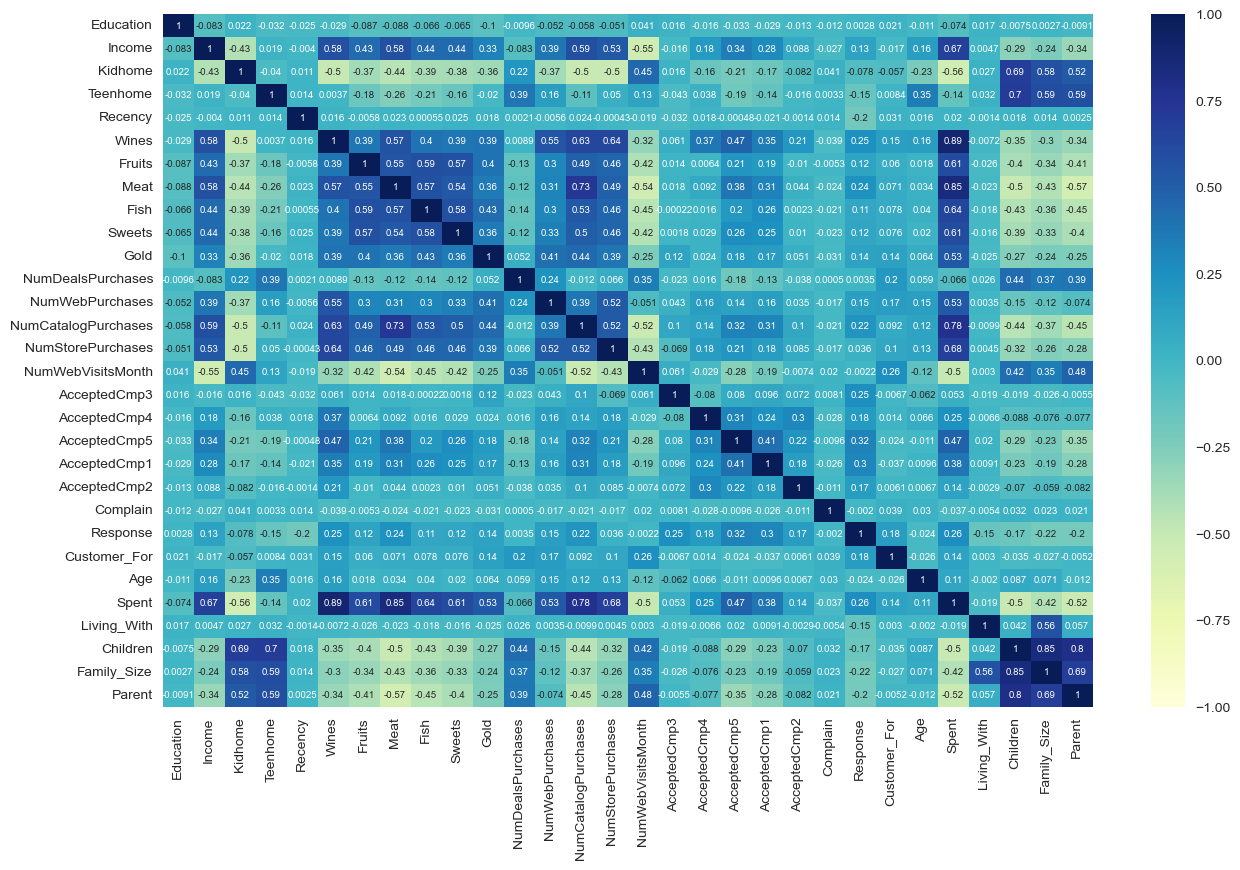

In [107]:
#Checking the correlation between our variables using Correlation heatmap

plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,vmin= -1, vmax= +1, annot_kws= {'size' : 7})
plt.show() 

In [108]:
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.611011,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.645307,0.947202,2.592509,0.714350
std,0.683469,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.478528,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,1.000000,3.000000,5.000000,1.000000


# We clearly see outliers in Income and Age columns. We will drop these outliers

In [109]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [110]:
df[['Age', 'Income']].describe()

,Age,Income
count,2212.000000,2212.000000
mean,53.086347,51958.810579
std,11.701599,21527.278844
min,26.000000,1730.000000
25%,45.000000,35233.500000
50%,52.000000,51371.000000
75%,63.000000,68487.000000
max,82.000000,162397.000000


<AxesSubplot:xlabel='Spent', ylabel='Income'>

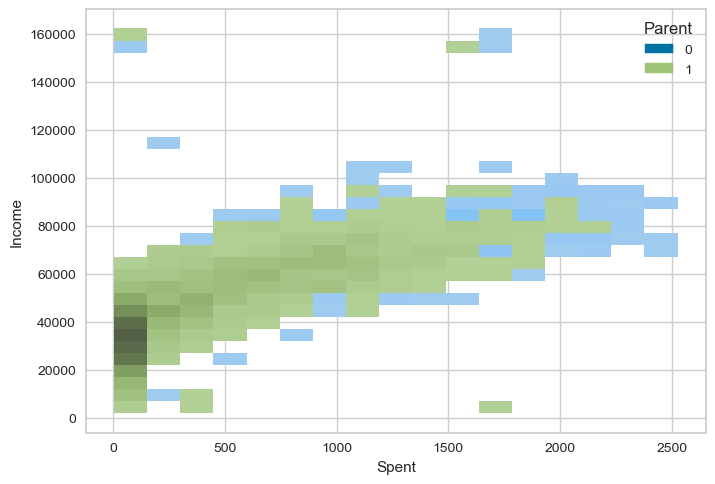

In [111]:
sns.histplot(data=df, y= 'Income', x= 'Spent', hue='Parent')

<AxesSubplot:xlabel='Parent', ylabel='Spent'>

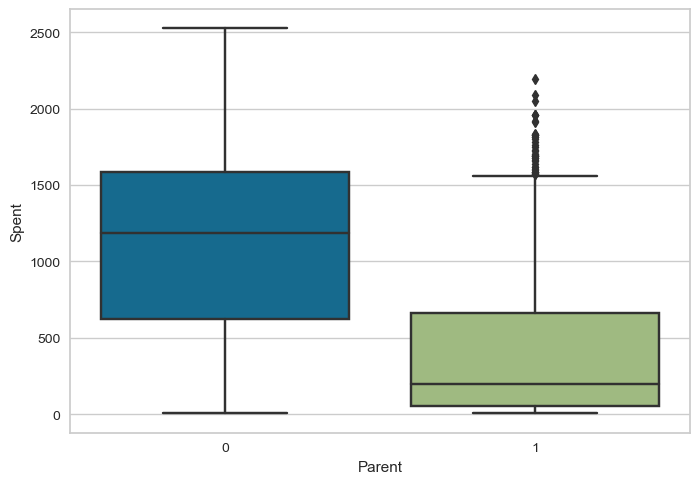

In [112]:
sns.boxplot(data=df, y= 'Spent', x= 'Parent')

<AxesSubplot:xlabel='Family_Size', ylabel='Spent'>

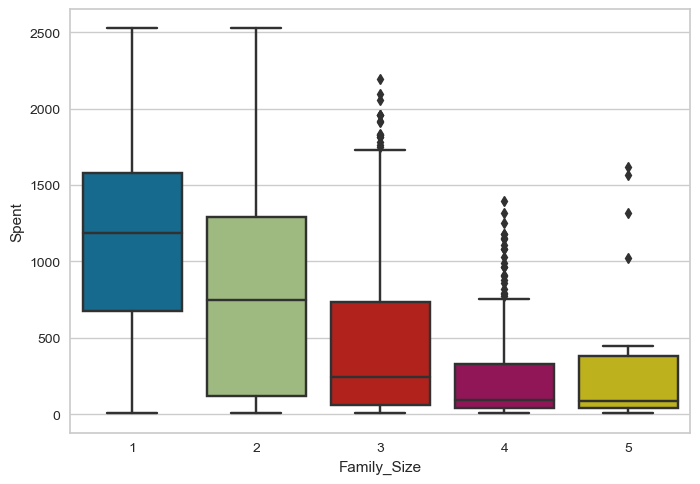

In [113]:
sns.boxplot(data=df, y= 'Spent', x= 'Family_Size')

<AxesSubplot:xlabel='Family_Size', ylabel='Spent'>

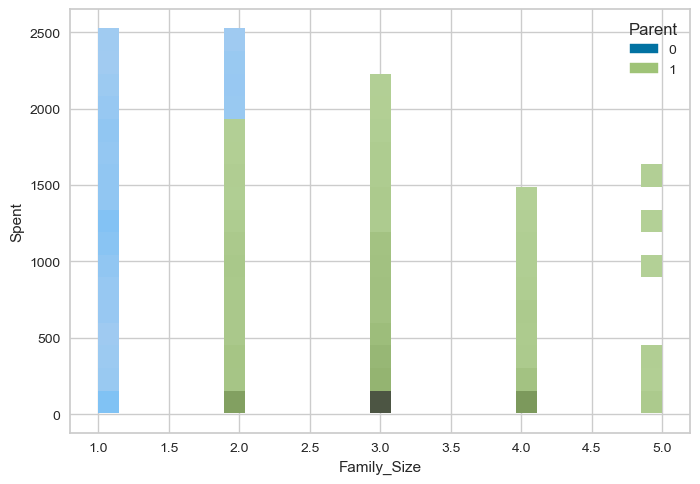

In [114]:
sns.histplot(data=df, y= 'Spent', x= 'Family_Size', hue='Parent')

# We will now Standardize our dataset with only the columns of interest

In [115]:
#Creating a copy of our dataframe for standardizing
ds= df.copy()

#Creating a subset of our dataframe after dropping accpeted campaing deals, complaimts and response
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

#Drop those columns
ds = ds.drop(cols_del, axis=1)

#Scale the data
scaler= StandardScaler()
scaler.fit(ds)
scaled_ds= pd.DataFrame(scaler.transform(ds),columns= ds.columns)
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [116]:
#sns.pairplot(scaled_ds)

# Dimesionality Reduction

The dataset has many features/vraiables on the basis of which the final classification will be done. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. It is better to remove them otherwise they will behave like duplicates. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA
Plotting the reduced dataframe

For this project, I will be reducing the dimensions to 3.

In [117]:
#Initiating PCA to reduce dimentions/features to 3
pca= PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds= pd.DataFrame(pca.transform(scaled_ds), columns=(['col1', 'col2','col3']))
PCA_ds.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,9.837419e-18,-2.148171e-17,2.860882e-18
std,2.878377e+00,1.706839e+00,1.221956e+00
min,-5.969394e+00,-4.312196e+00,-3.530416e+00
25%,-2.538494e+00,-1.328316e+00,-8.290674e-01
50%,-7.804209e-01,-1.581233e-01,-2.269238e-02
75%,2.383290e+00,1.242289e+00,7.998952e-01
max,7.444305e+00,6.142721e+00,6.611222e+00


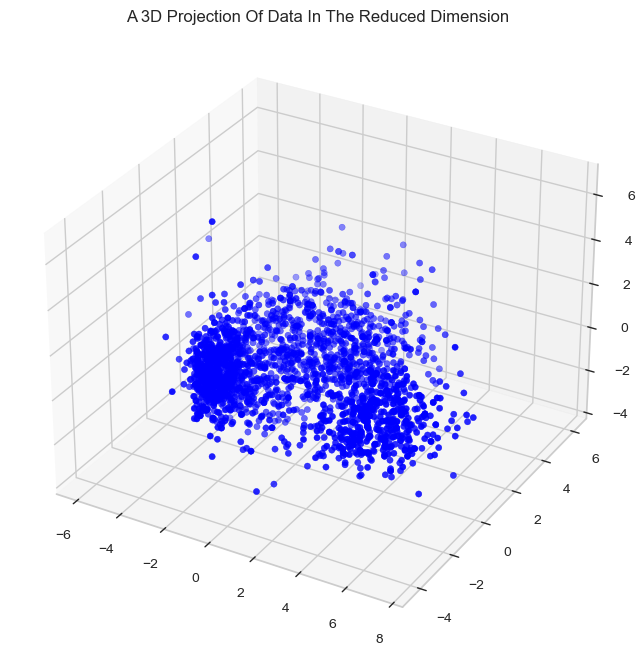

In [118]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

In [119]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow Method to determine the number of clusters to be formed:


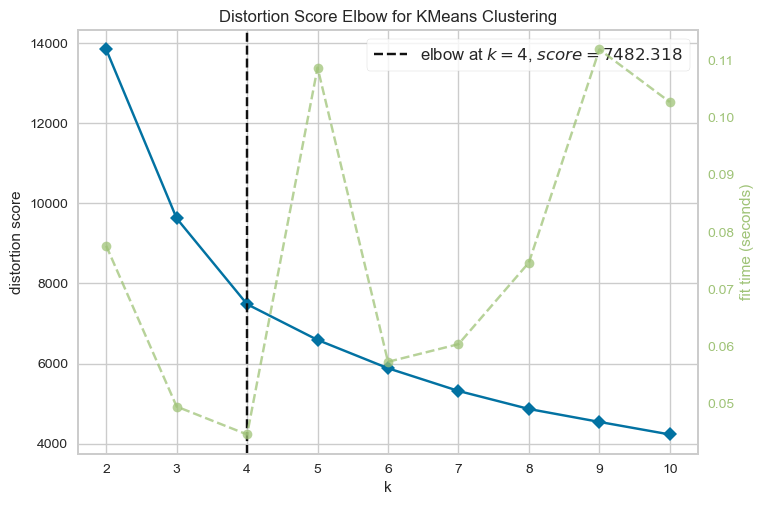

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above plot indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [121]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

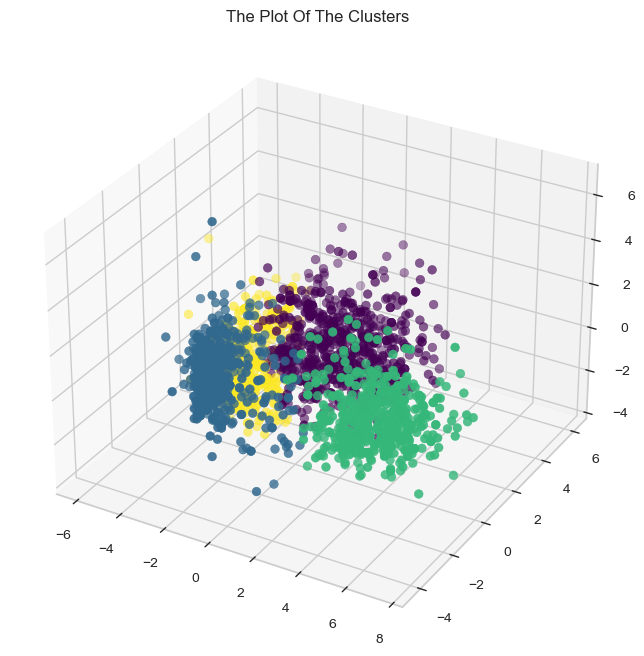

In [64]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o',cmap="viridis")
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating Models

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring

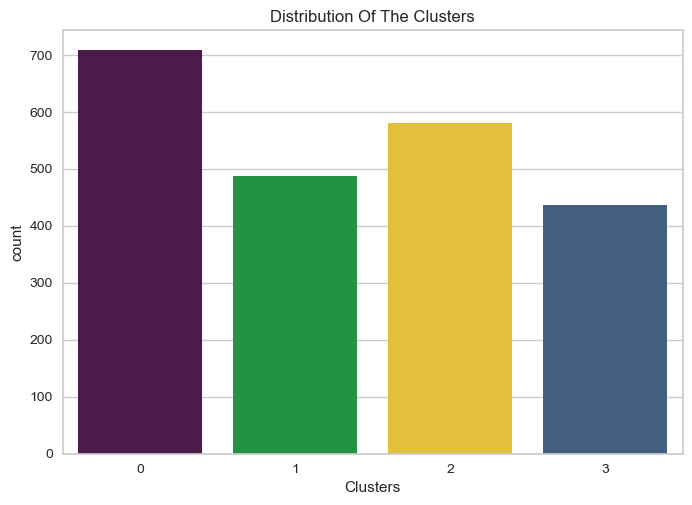

In [128]:
pal= ['#541352FF','#10a53dFF','#ffcf20FF','#3a5e8cFF']
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

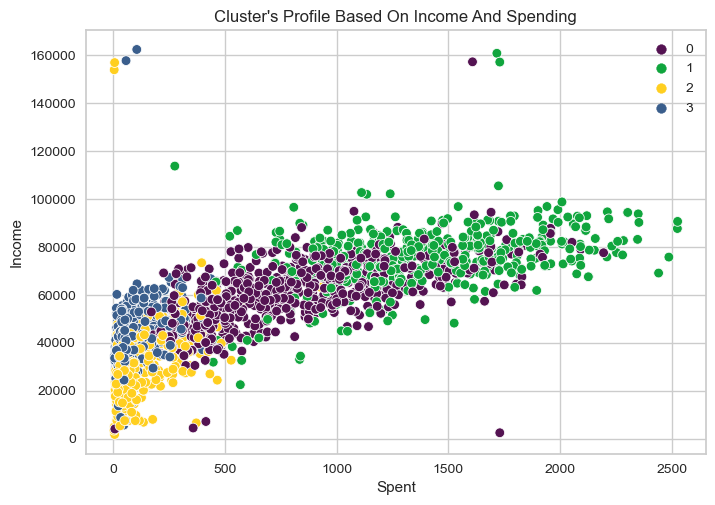

In [129]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs spending plot shows the clusters patterns**

****group 0: high spending & average income
    group 1: high spending & high income
    group 2: low spending & low income
    group 3: high spending & low income****

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

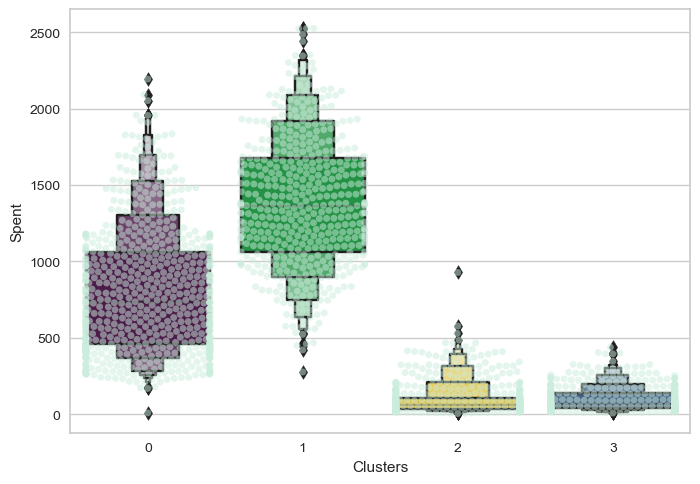

In [132]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how we did in our campaigns in the past.